In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby
from operator import itemgetter
import plotly.graph_objs as go

In [2]:
path = "C:\\Users\\Tiziano Pacifico\\Desktop\\TESI General\\TESI_FINAL_STAGE\\FASE 6\\DFs\\"
filename = "final_df.json"
df = pd.read_json(path+filename, lines=True)

In [3]:
df.head()

,author,created_utc,num_comments,utc_datetime_str,text,id,BERT_out,GPT_label,subjectivity,polarity
0,tattedboi1_,1682960456,3,2023-05-01 17:00:56,ChatGPT does not do stand up comedyI don’t thi...,134stgc,"[[bot, 0.12105691510000001], [pleas, 0.0709474...",AI Chatbot Interaction and Assistance on Cloud...,0.487247,0.117045
1,cstein123,1682960372,1,2023-05-01 16:59:32,Dreamcatcher - ChatGPT Retrieval on SteroidsA ...,134sq2h,"[[bot, 0.0493821331], [use, 0.0343607104], [ch...",Chatbot Interaction and Usage on Discord,0.377778,0.158333
2,Technology342,1682960259,2,2023-05-01 16:57:39,"Thoughts on this?[How to Jailbreak ChatGPT, Li...",134slvb,"[[dan, 0.0936920323], [anyth, 0.02693760130000...",Dan Discussing ChatGPT Jailbreaking Ethics,0.394444,0.166667
3,WW_III_ANGRY,1682959802,1,2023-05-01 16:50:02,Emergent abilities of chat GPT. We don't reall...,134s4jz,"[[like, 0.0201793395], [use, 0.0190240443], [a...",AI and ChatGPT in Everyday Life,0.492257,-0.074985
4,NiceGuy-n2,1682959399,1,2023-05-01 16:43:19,This chatgpt app gives me a 20 free chat credi...,134rp29,"[[bot, 0.12105691510000001], [pleas, 0.0709474...",AI Chatbot Interaction and Assistance on Cloud...,0.452381,0.200000


In [4]:
topics = df['GPT_label'].unique()

In [5]:
vectorizer = TfidfVectorizer()
topic_vectors = vectorizer.fit_transform(topics)

In [6]:
cosine_sim_matrix = cosine_similarity(topic_vectors)

In [7]:
df_heatmap = pd.DataFrame(cosine_sim_matrix, index=topics, columns=topics)

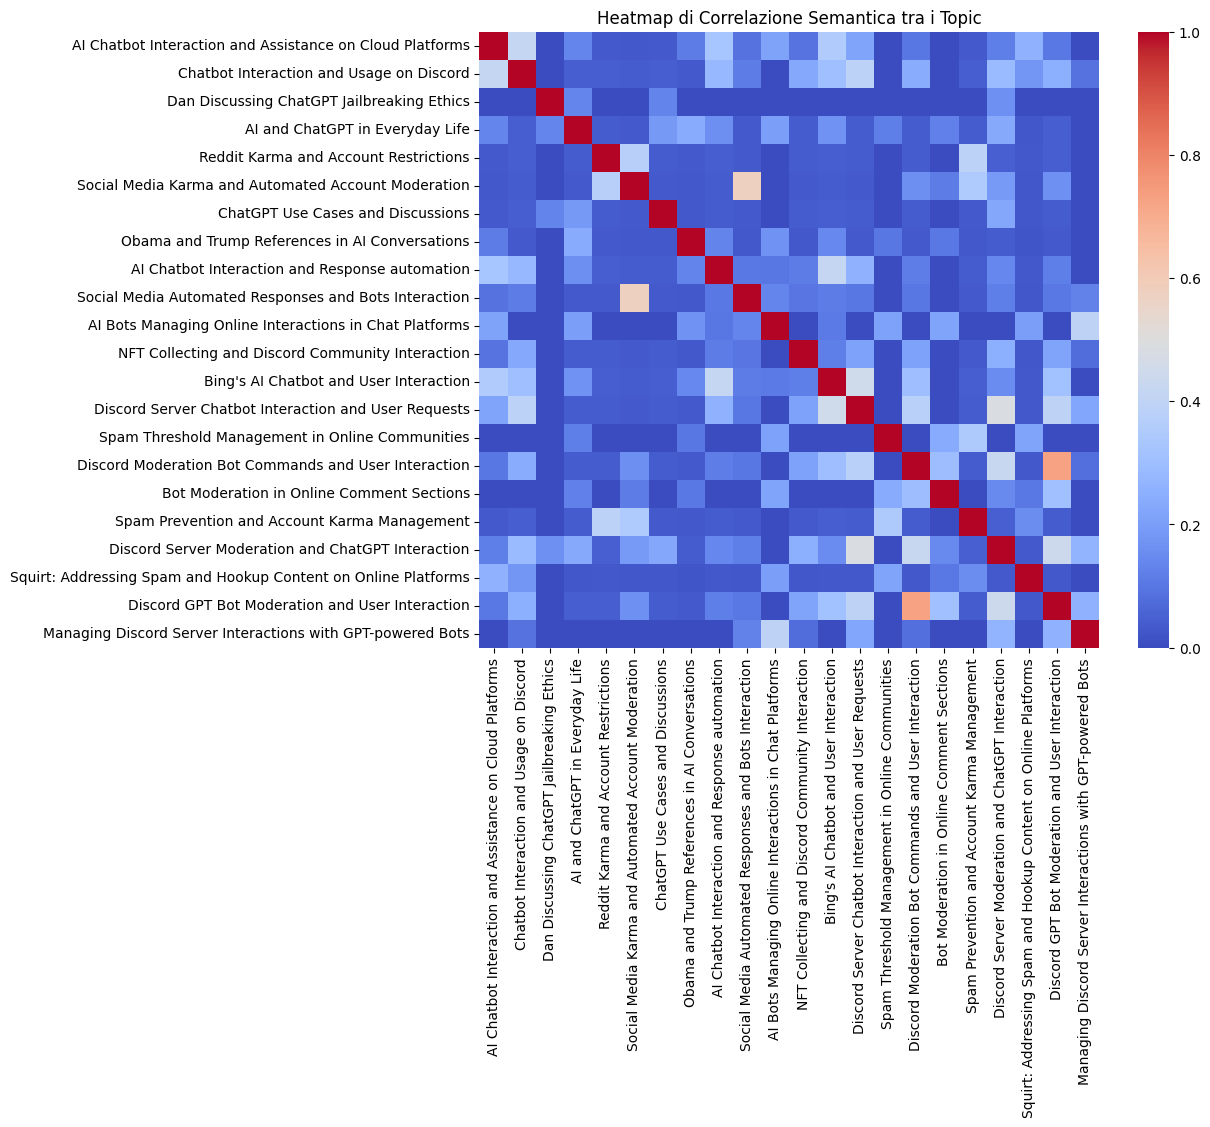

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, annot=False, cmap="coolwarm")
plt.title("Heatmap di Correlazione Semantica tra i Topic")
plt.show()

In [9]:
df_heatmap.head()

,AI Chatbot Interaction and Assistance on Cloud Platforms,Chatbot Interaction and Usage on Discord,Dan Discussing ChatGPT Jailbreaking Ethics,AI and ChatGPT in Everyday Life,Reddit Karma and Account Restrictions,Social Media Karma and Automated Account Moderation,ChatGPT Use Cases and Discussions,Obama and Trump References in AI Conversations,AI Chatbot Interaction and Response automation,Social Media Automated Responses and Bots Interaction,...,Bing's AI Chatbot and User Interaction,Discord Server Chatbot Interaction and User Requests,Spam Threshold Management in Online Communities,Discord Moderation Bot Commands and User Interaction,Bot Moderation in Online Comment Sections,Spam Prevention and Account Karma Management,Discord Server Moderation and ChatGPT Interaction,Squirt: Addressing Spam and Hookup Content on Online Platforms,Discord GPT Bot Moderation and User Interaction,Managing Discord Server Interactions with GPT-powered Bots
AI Chatbot Interaction and Assistance on Cloud Platforms,1.000000,0.414331,0.000000,0.133760,0.033307,0.029979,0.032092,0.112521,0.326591,0.086793,...,0.352549,0.216960,0.000000,0.098524,0.000000,0.031442,0.117395,0.257578,0.101921,0.000000
Chatbot Interaction and Usage on Discord,0.414331,1.000000,0.000000,0.041250,0.042035,0.037834,0.040502,0.034700,0.279167,0.109537,...,0.301355,0.388843,0.000000,0.239371,0.000000,0.039681,0.285221,0.177657,0.247625,0.086601
Dan Discussing ChatGPT Jailbreaking Ethics,0.000000,0.000000,1.000000,0.134392,0.000000,0.000000,0.131956,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163767,0.000000,0.000000,0.000000
AI and ChatGPT in Everyday Life,0.133760,0.041250,0.134392,1.000000,0.037689,0.033923,0.185778,0.237559,0.157817,0.033320,...,0.170361,0.037824,0.117257,0.037824,0.121671,0.035579,0.230565,0.027112,0.039128,0.000000
Reddit Karma and Account Restrictions,0.033307,0.042035,0.000000,0.037689,1.000000,0.371623,0.037006,0.031704,0.039298,0.033955,...,0.042421,0.038544,0.000000,0.038544,0.000000,0.389764,0.045927,0.027628,0.039873,0.000000


In [10]:
score_list = []
for ex,tx in enumerate(topics):
    for ey,ty in enumerate(topics):
        if ey > ex:
            score_list.append(df_heatmap.iloc[ey,ex])

In [11]:
print(min(score_list),max(score_list))

0.0 0.7286236446065787


In [12]:
totale = 0
for score in score_list:
    totale += score
avg = totale/len(score_list)
avg

0.10166729082582522

In [13]:
def get_chiave(valore):
    limite_superiore = int(valore * 10) / 10.0
    return f'{limite_superiore:.1f}'

In [17]:
score_list_ordinata = sorted(score_list)

In [21]:
gruppi = {chiave: list(valori) for chiave, valori in groupby(score_list_ordinata, key=get_chiave)}

In [24]:
freq_gruppi = {chiave: len(valori) for chiave,valori in gruppi.items()}

In [31]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=list(freq_gruppi.keys()),
    x=list(freq_gruppi.values()),
    name='freq similarity',
    orientation='h',
    text=list(freq_gruppi.values()),
    textposition='outside', 
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.update_layout(
    title=dict(
        text='<b>Frequenza delle classi di similarità',  # Title text
        x=0.5,  # x=0.5 centers the title
        xanchor='center',  # 'center' ensures the title is centered
        font=dict(
            size=24,
            color='black',
            family="Arial, sans-serif",
        )
        ),
    xaxis_title="N topics relations",
    yaxis_title="similaruty class",
    yaxis=dict(
        tickfont=dict(
            size=14,  # Aumenta la dimensione del font delle label dell'asse Y
            color='blue'  # Opzionale: cambia il colore del font (esempio)
        )
    )
)
fig.update_layout(
    width=1200,   # Larghezza in pixel
    height=500   # Altezza in pixel
)